In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import string
import os
from timeit import default_timer as timer

base="../../data/clean/"
pd.set_option('display.max_rows', 150)

In [21]:
targets = pd.read_csv(base+"filtered_nonlog_target.csv").iloc[:,1:]
targets

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Albury,544.4263,563.5963,525.2564,216.6203,1315.0580,316.3040
1,Armidale Regional,501.4681,653.2282,841.2787,221.0419,2217.0169,287.0245
2,Ballina,255.7125,321.4001,504.3870,154.8351,795.2893,152.4891
3,Bathurst Regional,438.7931,462.3841,686.4989,200.5237,1184.2695,226.4738
4,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
5,Bega Valley,312.2606,341.7192,318.1524,153.1845,810.1102,153.1845
6,Bellingen,279.2213,263.7090,248.1967,116.3422,604.9794,93.0738
7,Berrigan,174.9883,139.9907,163.3224,81.6612,699.9533,279.9813
8,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
9,Bland,348.2010,315.0390,281.8770,215.5530,746.1449,381.3630


In [3]:
crimes = targets.columns[1:]
crimes

Index(['Assault - domestic violence', 'Assault - non-domestic violence',
       'Fraud', 'Sexual Offences', 'Malicious damage to property',
       'Prohibited weapons offences'],
      dtype='object')

In [4]:
tfidf_preds=pd.read_csv(os.path.join(base, 'tfidf_by_lga_and_time_of_day_2016_rfr_preds.csv'))
tfidf_preds

,LGA,TF-IDF Assault - domestic violence,TF-IDF Assault - non-domestic violence,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences
0,Albury,477.301873,418.397087,584.012860,196.170292,1124.752268,231.835807
1,Armidale Regional,460.727393,391.841167,425.435200,196.414083,1003.058845,231.269322
2,Ballina,468.255328,433.765488,576.674090,220.255568,1032.020485,239.359978
3,Bathurst Regional,556.570488,434.045633,522.160865,229.290217,1013.712130,251.559590
4,Bayside,259.215042,280.906430,592.332382,106.876427,540.547368,109.994835
5,Bega Valley,429.363977,498.807597,465.062662,203.617620,1033.803275,219.865595
6,Bellingen,405.233698,416.211653,346.964275,225.030533,879.991630,308.142215
7,Berrigan,536.937372,451.544765,401.050937,211.007365,971.784085,316.459325
8,Blacktown,345.790888,320.093980,504.609503,144.208582,695.388555,154.947338
9,Bland,602.418592,417.884093,259.077642,208.489933,989.414680,337.289963


In [6]:
opal_preds = pd.read_csv(os.path.join(base, 'opal_predictions.csv'))
opal_preds = targets[['LGA']].merge(opal_preds,left_on='LGA',right_on='lga')
opal_cols = opal_preds.columns[-6:].tolist()
new_cols = ['Opal ' + name[:-6] for name in opal_cols]
opal_preds = opal_preds[['LGA']+opal_cols]
opal_preds.columns = ['LGA'] + new_cols
opal_preds

,LGA,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Bayside,240.04683,251.44485,957.07532,118.53787,669.48002,102.41664
1,Blacktown,448.68270,369.00774,765.48802,111.35508,601.79515,150.18557
2,Blue Mountains,354.98269,589.64388,568.38435,160.42870,666.16501,139.55865
3,Burwood,209.60683,290.35682,771.38915,112.80608,565.22550,90.16539
4,Camden,336.64321,414.51482,450.03217,127.66312,681.06307,101.28565
5,Campbelltown,494.86911,392.00477,600.30639,100.01313,819.57515,119.61388
6,Canada Bay,130.90293,200.22517,634.62000,80.03552,444.92128,71.11851
7,Canterbury-Bankstown,309.50081,306.55209,644.08625,94.43336,676.38632,157.82450
8,Central Coast,503.85355,381.77542,724.39506,167.02125,810.36537,146.77340
9,Cumberland,306.34490,344.35048,777.28889,122.07886,629.92727,127.28902


In [7]:
derived = pd.read_csv(os.path.join(base, 'twitter_17_features.csv'))
derived = derived.rename(columns={'lga': 'LGA'})
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,Morning_pcapita,Afternoon_pcapita,Evening_pcapita,Prof_exists_pcapita,tr_tweeters,ja_tweeters,in_tweeters,tl_tweeters
0,Woollahra,0.000000,0.001180,348,0.621871,-3.698370e-04,-0.000593,-0.000321,-0.000831,0.017662,0.024631,0.015431,0.012242,0.000922,1,0,2,3
1,Camden,0.376190,0.000575,210,0.861029,-5.940000e-05,-0.000135,-0.000083,-0.000101,0.005127,0.006968,0.002007,0.003286,0.000102,0,2,0,1
2,Albury,0.339355,0.006304,775,0.316016,-2.668738e-03,-0.007370,-0.004476,-0.008072,0.128044,0.152263,0.045873,0.083836,0.024101,4,3,26,29
3,North Sydney,0.021667,0.002468,600,0.271039,-2.515400e-04,-0.001465,-0.001000,-0.003199,0.032162,0.064102,0.004818,0.021505,0.003326,1,3,11,13
4,Central Coast,0.423130,0.004034,3597,0.415482,-1.442578e-03,-0.002636,-0.001770,-0.004374,0.063624,0.091702,0.030927,0.045790,0.007695,25,13,89,129
5,Fairfield,0.108527,0.000121,129,0.685430,-5.920000e-06,-0.000015,-0.000007,-0.000016,0.000679,0.000503,0.000070,0.000267,0.000030,1,0,1,0
6,Temora,0.239130,0.002946,46,0.714286,-4.090000e-05,-0.000385,-0.000062,-0.000291,0.008347,0.008183,0.001146,0.002946,0.000000,0,0,1,0
7,Cobar,0.354167,0.002798,48,0.779412,-5.600990e-04,-0.000097,-0.000579,-0.001142,0.018076,0.035076,0.016785,0.017861,0.000646,0,0,2,0
8,Lithgow,0.599415,0.003035,342,0.577253,-3.100381e-03,-0.003576,-0.001902,-0.003767,0.080322,0.083784,0.025699,0.036984,0.011996,2,1,5,7
9,Glen Innes Severn,0.477612,0.001245,67,0.554392,-5.656030e-04,-0.001579,-0.000404,-0.004404,0.065980,0.082390,0.019466,0.026709,0.003508,1,0,1,2


In [8]:
derived_features = derived.columns[1:]
derived = derived.merge(tfidf_preds, on='LGA')
derived = derived.sort_values(by=['LGA'])
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,...,tr_tweeters,ja_tweeters,in_tweeters,tl_tweeters,TF-IDF Assault - domestic violence,TF-IDF Assault - non-domestic violence,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences
2,Albury,0.339355,0.006304,775,0.316016,-2.668738e-03,-0.007370,-0.004476,-0.008072,0.128044,...,4,3,26,29,477.301873,418.397087,584.012860,196.170292,1124.752268,231.835807
108,Armidale Regional,0.375817,0.003362,306,0.514424,-1.420306e-03,-0.001944,-0.001170,-0.004177,0.062039,...,0,1,5,5,460.727393,391.841167,425.435200,196.414083,1003.058845,231.269322
99,Ballina,0.594556,0.003853,698,0.550613,-4.771620e-04,-0.001150,-0.000811,-0.001753,0.040608,...,0,4,10,10,468.255328,433.765488,576.674090,220.255568,1032.020485,239.359978
56,Bathurst Regional,0.476974,0.004383,608,0.444390,-5.426010e-04,-0.002403,-0.001372,-0.004298,0.047240,...,0,1,4,7,556.570488,434.045633,522.160865,229.290217,1013.712130,251.559590
85,Bayside,0.042857,0.001538,770,0.265229,-1.429040e-04,-0.000496,-0.000353,-0.000652,0.009817,...,1,6,10,14,259.215042,280.906430,592.332382,106.876427,540.547368,109.994835
93,Bega Valley,0.482255,0.004511,479,0.607501,-3.962660e-04,-0.001393,-0.001108,-0.002086,0.046492,...,1,0,18,19,429.363977,498.807597,465.062662,203.617620,1033.803275,219.865595
44,Bellingen,0.556122,0.003237,196,0.838773,-2.228930e-04,-0.000827,-0.000857,-0.001145,0.040654,...,0,1,3,7,405.233698,416.211653,346.964275,225.030533,879.991630,308.142215
55,Berrigan,0.362745,0.003663,102,0.349639,-1.002788e-03,-0.002198,-0.000516,-0.002749,0.047034,...,1,0,5,2,536.937372,451.544765,401.050937,211.007365,971.784085,316.459325
100,Blacktown,0.060345,0.000258,348,0.380935,-4.140000e-05,-0.000051,-0.000039,-0.000161,0.002181,...,2,1,7,9,345.790888,320.093980,504.609503,144.208582,695.388555,154.947338
42,Bland,0.258065,0.001511,31,0.812766,-5.520570e-04,-0.001278,-0.000905,-0.001317,0.013266,...,0,0,0,0,602.418592,417.884093,259.077642,208.489933,989.414680,337.289963


In [9]:
derived = derived.merge(opal_preds, on='LGA')
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,...,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Bayside,0.042857,0.001538,770,0.265229,-0.000143,-0.000496,-0.000353,-0.000652,0.009817,...,592.332382,106.876427,540.547368,109.994835,240.04683,251.44485,957.07532,118.53787,669.48002,102.41664
1,Blacktown,0.060345,0.000258,348,0.380935,-0.000041,-0.000051,-0.000039,-0.000161,0.002181,...,504.609503,144.208582,695.388555,154.947338,448.68270,369.00774,765.48802,111.35508,601.79515,150.18557
2,Blue Mountains,0.616197,0.004460,1988,0.628117,-0.000675,-0.001754,-0.001256,-0.003250,0.061154,...,557.604407,185.612120,907.327357,200.915877,354.98269,589.64388,568.38435,160.42870,666.16501,139.55865
3,Burwood,0.000000,0.001087,87,0.160139,-0.000177,-0.000229,-0.000165,-0.000286,0.007607,...,496.735583,187.683080,680.695175,152.333185,209.60683,290.35682,771.38915,112.80608,565.22550,90.16539
4,Camden,0.376190,0.000575,210,0.861029,-0.000059,-0.000135,-0.000083,-0.000101,0.005127,...,387.601848,180.490498,745.775865,258.652690,336.64321,414.51482,450.03217,127.66312,681.06307,101.28565
5,Campbelltown,0.158537,0.000217,164,0.332691,-0.000061,-0.000234,-0.000120,-0.000345,0.004662,...,454.303428,157.939057,756.952477,240.577473,494.86911,392.00477,600.30639,100.01313,819.57515,119.61388
6,Canada Bay,0.000000,0.000648,177,0.322667,-0.000057,-0.000084,-0.000069,-0.000356,0.002852,...,614.408797,93.046830,462.355115,138.224447,130.90293,200.22517,634.62000,80.03552,444.92128,71.11851
7,Canterbury-Bankstown,0.008696,0.000165,230,0.632827,-0.000008,-0.000034,-0.000009,-0.000030,0.001016,...,445.149563,107.239450,652.171733,113.308723,309.50081,306.55209,644.08625,94.43336,676.38632,157.82450
8,Central Coast,0.423130,0.004034,3597,0.415482,-0.001443,-0.002636,-0.001770,-0.004374,0.063624,...,507.004588,163.915885,1159.133355,231.903652,503.85355,381.77542,724.39506,167.02125,810.36537,146.77340
9,Cumberland,0.000000,0.000227,162,0.122591,-0.000038,-0.000184,-0.000147,-0.000330,0.003064,...,581.809770,140.269207,534.240780,141.340593,306.34490,344.35048,777.28889,122.07886,629.92727,127.28902


In [22]:
# Truncate targets to just OPAL LDAs also:
opal_lgas = opal_preds.LGA
targets = targets[targets.LGA.isin(opal_lgas)].reset_index(drop=True)
targets

,LGA,Assault - domestic violence,Assault - non-domestic violence,Fraud,Sexual Offences,Malicious damage to property,Prohibited weapons offences
0,Bayside,315.9874,274.1388,728.4085,85.5167,584.6676,108.5638
1,Blacktown,594.3767,453.1188,821.0799,163.9858,980.7504,148.7380
2,Blue Mountains,317.6418,254.1135,398.9581,177.8794,750.9053,104.1865
3,Burwood,187.0373,342.9017,1467.7231,111.7028,527.3412,70.1390
4,Camden,277.1012,218.6987,547.9895,109.3494,550.4747,100.6511
5,Campbelltown,578.0347,446.6913,689.5526,214.9818,1084.8218,201.3518
6,Canada Bay,116.9059,149.3797,760.9708,61.7003,351.8001,44.3809
7,Canterbury-Bankstown,372.2850,290.6920,748.7187,88.2310,568.3845,123.3574
8,Central Coast,524.5908,440.4892,612.8675,206.9733,1046.4974,150.0109
9,Cumberland,382.2146,326.9174,725.5000,114.1335,561.8201,132.7134


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
derived[derived.columns[1:]] = scaler.fit_transform(derived[derived.columns[1:]])
derived

,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,...,TF-IDF Fraud,TF-IDF Sexual Offences,TF-IDF Malicious damage to property,TF-IDF Prohibited weapons offences,Opal Assault - domestic violence,Opal Assault - non-domestic violence,Opal Fraud,Opal Sexual Offences,Opal Malicious damage to property,Opal Prohibited weapons offences
0,Bayside,0.066700,0.165568,0.183136,0.193162,0.951931,0.927172,0.907930,0.935867,0.051201,...,0.504467,0.114711,0.109702,0.112755,0.310372,0.152980,0.614819,0.368764,0.700100,0.386374
1,Blacktown,0.093916,0.016061,0.071937,0.349852,0.986677,0.994515,0.991535,0.985400,0.008417,...,0.288313,0.424367,0.326940,0.333351,0.855776,0.322319,0.390847,0.317617,0.564861,0.739750
2,Blue Mountains,0.959005,0.506968,0.504084,0.684587,0.769879,0.736569,0.667226,0.673669,0.338850,...,0.418896,0.767794,0.624285,0.558932,0.610830,0.640128,0.160426,0.667056,0.693476,0.661136
3,Burwood,0.000000,0.112854,0.003162,0.050849,0.940401,0.967580,0.957931,0.972814,0.038817,...,0.268912,0.784971,0.306326,0.320522,0.230797,0.209029,0.397746,0.327950,0.491792,0.295744
4,Camden,0.585476,0.053111,0.035573,1.000000,0.980516,0.981924,0.979839,0.991478,0.024921,...,0.000000,0.725312,0.397632,0.842264,0.562888,0.387869,0.022069,0.433742,0.723244,0.378007
5,Campbelltown,0.246735,0.011197,0.023452,0.284519,0.979934,0.966826,0.969782,0.966837,0.022319,...,0.164356,0.538256,0.413313,0.753564,0.976513,0.355445,0.197744,0.236855,1.000000,0.513593
6,Canada Bay,0.000000,0.061558,0.026877,0.270945,0.981303,0.989514,0.983436,0.965705,0.012174,...,0.558865,0.000000,0.000000,0.251286,0.025054,0.079202,0.237858,0.094600,0.251417,0.154842
7,Canterbury-Bankstown,0.013533,0.005127,0.040843,0.690967,0.998004,0.997227,0.999507,0.998597,0.001891,...,0.141801,0.117722,0.266308,0.129017,0.491934,0.232357,0.248924,0.197123,0.713899,0.796260
8,Central Coast,0.658530,0.457155,0.928063,0.396636,0.507040,0.602925,0.530280,0.560228,0.352691,...,0.294215,0.587832,0.977563,0.710999,1.000000,0.340710,0.342808,0.714000,0.981598,0.714508
9,Cumberland,0.000000,0.012390,0.022925,0.000000,0.987841,0.974430,0.962653,0.968328,0.013362,...,0.478539,0.391692,0.100854,0.266578,0.483684,0.286803,0.404643,0.393978,0.621071,0.570370


In [11]:
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# X must be a dataframe of input variables
# y must be a dataframe with one or more label columns, and last column of target.
# The first columns of y will be used as labels to return results.
def rfr_cv(X, y, folds=5, verbose=True, random_state=2018):
    assert len(X) == len(y)

    # Empty dataframe for predictions
    preds = pd.DataFrame(columns = y.columns)
    preds['predicted'] = 0
    importants = defaultdict(float)
    kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
    for train_index, test_index in kf.split(X):
        X_train_df, X_test_df = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train_df, y_test_df = y.iloc[train_index,:], y.iloc[test_index,:].copy()
                
        model = RandomForestRegressor(random_state=random_state)
        model.fit(X_train_df, y_train_df.iloc[:,-1])
        
        # Save important features
        importances = model.feature_importances_
        for i in range(len(importances)):
            importants[X_train_df.columns[i]] += importances[i] / folds

        # Save predictions
        y_test_df['predicted'] = model.predict(X_test_df)
        preds = pd.concat([preds,y_test_df])
        
        if verbose:
            print('Finished processing',len(preds),'records...')

    return preds, importants

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metrics(predictions, importants):
    print('MOST IMPORTANT FEATURES:')
    for w in sorted(importants, key=importants.get, reverse=True)[0:20]:
      print(w, importants[w])

    y = predictions.iloc[:,-2]
    pred = predictions.iloc[:,-1]
    print('R2:',r2_score(y,pred))
    print('RMSE:',np.sqrt(mean_squared_error(y,pred)))
    print('MAPE:',mape(y,pred))
    print('Mean APE Baseline:',mape(y,np.mean(y)))

    fig, ax = plt.subplots()
    ax.scatter(y, pred, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()


RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF.
Assault - domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 5 fold cross validation in 0.12616238091140985 seconds
MOST IMPORTANT FEATURES:
TF-IDF Assault - domestic violence 0.33627681978
replyers_per_capita 0.174146379126
tr_tweeters 0.0590488463058
in_tweeters 0.0574851963164
tl_tweeters 0.0361499747323
ja_tweeters 0.034971937777
Night_pcapita 0.0340244003198
Polr_Neg_A_pcapita 0.0338917780526
Polr_Neg_M_pcapita 0.0337316297337
link_tweets_ratio 0.0296840964471
Polr_Neg_N_pcapita 0.0275495967854
total_tweeters 0.026501728388
instagrammers_ratio 0.0253155409015
Evening_pcapita 0.0250257349588
Afternoon_pcapita 0.0233623912703
Polr

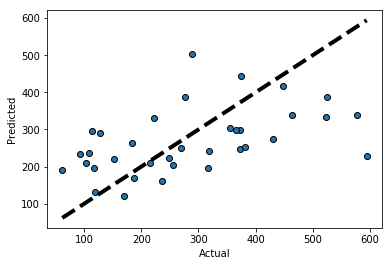

Assault - non-domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 5 fold cross validation in 0.13750641886144876 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.252325951421
ja_tweeters 0.214726460586
tr_tweeters 0.168411867001
replyers_per_capita 0.0629042261331
Polr_Neg_N_pcapita 0.0370656234198
Prof_exists_pcapita 0.0296674434914
Evening_pcapita 0.0275341029805
tl_tweeters 0.0270294345843
in_tweeters 0.0240696348769
Night_pcapita 0.0235664682798
Afternoon_pcapita 0.0230730153235
link_tweets_ratio 0.021784184354
Polr_Neg_M_pcapita 0.0186775013129
TF-IDF Assault - non-domestic violence 0.0154667288437
Polr_Neg_E_pcapita 0.014181895728
Polr_Neg_A_pcapita 0.0140548877882
Mornin

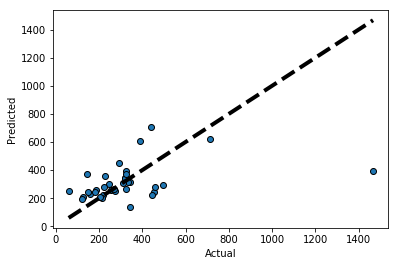

Fraud
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 5 fold cross validation in 0.13854169007390738 seconds
MOST IMPORTANT FEATURES:
TF-IDF Fraud 0.231538421979
total_tweeters 0.198659830411
instagrammers_ratio 0.106956974623
ja_tweeters 0.106057517949
tr_tweeters 0.0764989479643
link_tweets_ratio 0.0754357902026
tl_tweeters 0.0633736037864
Polr_Neg_N_pcapita 0.0319144458619
Prof_exists_pcapita 0.0227648438912
Polr_Neg_A_pcapita 0.0166950309427
Afternoon_pcapita 0.0127377148811
Night_pcapita 0.0115782533945
Evening_pcapita 0.010627390453
Polr_Neg_E_pcapita 0.0102536586952
replyers_per_capita 0.00999804256558
in_tweeters 0.00668924493395
Polr_Neg_M_pcapita 0.00418807122513
Morning_pcapita 0.0

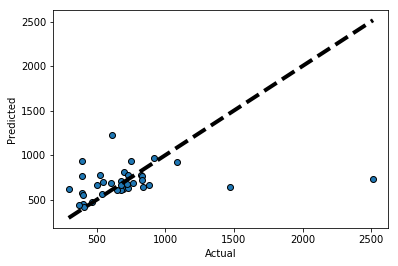

Sexual Offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 5 fold cross validation in 0.13923151372000575 seconds
MOST IMPORTANT FEATURES:
TF-IDF Sexual Offences 0.290201902595
total_tweeters 0.099871757273
tl_tweeters 0.0972550434763
link_tweets_ratio 0.0736797531667
tr_tweeters 0.0643162023399
instagrammers_ratio 0.0611751965369
replyers_per_capita 0.0592760794986
Polr_Neg_A_pcapita 0.0527344578515
Afternoon_pcapita 0.0461745904773
Polr_Neg_M_pcapita 0.0253600429798
ja_tweeters 0.0220140655584
in_tweeters 0.0208841564528
Morning_pcapita 0.0200975004317
Polr_Neg_E_pcapita 0.0190667912226
Prof_exists_pcapita 0.0157752040389
Night_pcapita 0.0156236173325
Evening_pcapita 0.00974138788938
P

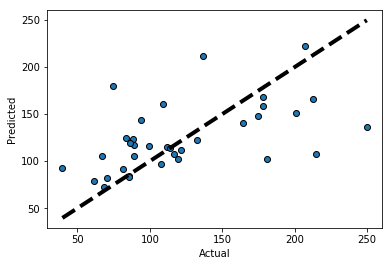

Malicious damage to property
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 5 fold cross validation in 0.14036332489922643 seconds
MOST IMPORTANT FEATURES:
tr_tweeters 0.198063049007
tl_tweeters 0.178446276247
TF-IDF Malicious damage to property 0.120330254313
replyers_per_capita 0.112985588957
total_tweeters 0.0692996157955
link_tweets_ratio 0.0484963556975
instagrammers_ratio 0.0465307803671
Evening_pcapita 0.045945992962
Morning_pcapita 0.030571488259
Night_pcapita 0.0282645215089
Polr_Neg_N_pcapita 0.0239550637866
Afternoon_pcapita 0.0197493529949
ja_tweeters 0.0178127103666
Prof_exists_pcapita 0.0132447695262
in_tweeters 0.0132343701708
Polr_Neg_A_pcapita 0.0131497761033
Polr_Neg_M_pcap

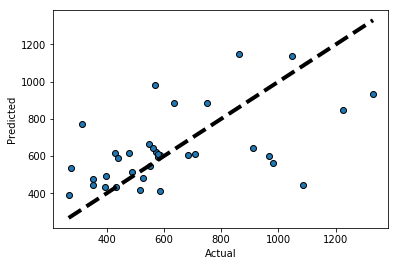

Prohibited weapons offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 5 fold cross validation in 0.13617152627557516 seconds
MOST IMPORTANT FEATURES:
replyers_per_capita 0.189920837575
tr_tweeters 0.173309106728
TF-IDF Prohibited weapons offences 0.121076562438
total_tweeters 0.0590567183568
Night_pcapita 0.0589795229838
in_tweeters 0.0508389926999
ja_tweeters 0.0494998358373
Evening_pcapita 0.0463872469597
link_tweets_ratio 0.0438320220416
tl_tweeters 0.0408631364899
instagrammers_ratio 0.0391381262087
Polr_Neg_N_pcapita 0.0375822329874
Prof_exists_pcapita 0.0287076618919
Polr_Neg_M_pcapita 0.0170159907715
Afternoon_pcapita 0.014355893556
Polr_Neg_E_pcapita 0.0124645424948
Morning_pcap

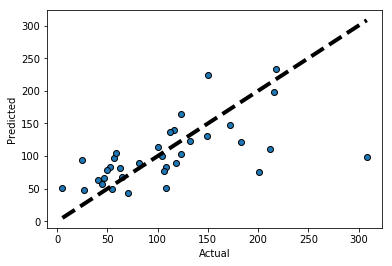

In [24]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist() + ['TF-IDF '+crime]
    y_cols = ['LGA',crime]
    X = derived[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 5 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['TFIDF+DERIVED '+crime] = preds[preds.columns[-1]]

In [25]:
output.to_csv("../../data/clean/ensemble_gs_tfidf_17_rfr_preds.csv",index=False)

RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF AND OPAL:
Assault - domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1263722898438573 seconds
MOST IMPORTANT FEATURES:
Opal Assault - domestic violence 0.495327660312
TF-IDF Assault - domestic violence 0.167466494689
replyers_per_capita 0.0599540266292
in_tweeters 0.0418631017498
instagrammers_ratio 0.0303426278033
Polr_Neg_A_pcapita 0.0279936164138
ja_tweeters 0.0240681682893
Polr_Neg_M_pcapita 0.0204392469116
tr_tweeters 0.0169814415285
link_tweets_ratio 0.0167218484501
Morning_pcapita 0.0156554554764
Afternoon_pcapita 0.0154658434076
Night_pcapita 0.0130956334967
tl_tweeters 0.0114551890839
Polr_Neg_

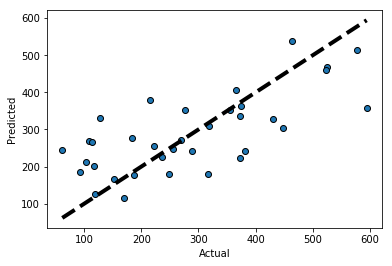

Assault - non-domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13785192044451833 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.268672597072
ja_tweeters 0.201317861934
tr_tweeters 0.171570102327
replyers_per_capita 0.0618187290659
Afternoon_pcapita 0.0427526326356
Polr_Neg_N_pcapita 0.0395462730756
Opal Assault - non-domestic violence 0.026720536804
tl_tweeters 0.0264517419411
in_tweeters 0.0231659617992
link_tweets_ratio 0.0215428675598
Night_pcapita 0.0213687946034
Prof_exists_pcapita 0.0201320043097
instagrammers_ratio 0.0142731655633
Polr_Neg_E_pcapita 0.013658866533
Polr_Neg_A_pcapita 0.0124713744488
TF-IDF Assault - non-domestic violence

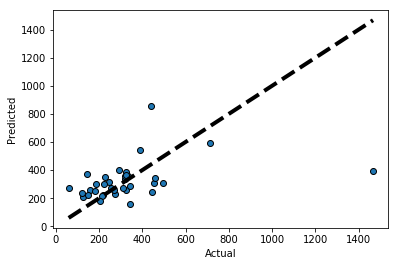

Fraud
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13972239568829536 seconds
MOST IMPORTANT FEATURES:
total_tweeters 0.215070262031
TF-IDF Fraud 0.213046175308
instagrammers_ratio 0.102507660793
ja_tweeters 0.0947400601914
link_tweets_ratio 0.0661978314749
Opal Fraud 0.0652736097738
tr_tweeters 0.0651050666054
tl_tweeters 0.061674705408
Polr_Neg_N_pcapita 0.0286410741199
Prof_exists_pcapita 0.0185018392896
Afternoon_pcapita 0.0104359089908
Polr_Neg_E_pcapita 0.0102737198852
Evening_pcapita 0.0101832320121
Night_pcapita 0.0094987842096
Polr_Neg_A_pcapita 0.00832410289626
replyers_per_capita 0.00698250947177
in_tweeters 0.00537001742486
Polr_Neg_M_pcapita 0.0045

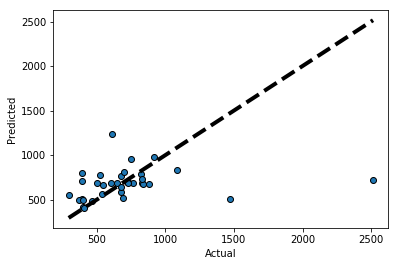

Sexual Offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.133121769875288 seconds
MOST IMPORTANT FEATURES:
TF-IDF Sexual Offences 0.255461459208
total_tweeters 0.0988982708647
Opal Sexual Offences 0.0947034240613
tl_tweeters 0.0897818276393
replyers_per_capita 0.0700459539461
link_tweets_ratio 0.0623351028965
tr_tweeters 0.0611826470722
instagrammers_ratio 0.0600941157886
Polr_Neg_A_pcapita 0.0548410612042
Afternoon_pcapita 0.0346700209251
Morning_pcapita 0.0278126745469
ja_tweeters 0.0180575665874
Polr_Neg_E_pcapita 0.0138711965084
Prof_exists_pcapita 0.0129700065799
Polr_Neg_M_pcapita 0.0126887161221
in_tweeters 0.0108830881448
Evening_pcapita 0.009890961

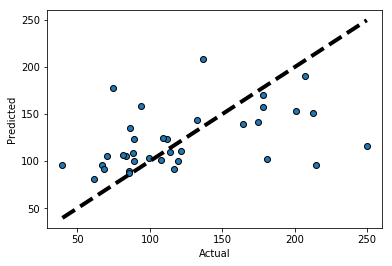

Malicious damage to property
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13637705892324448 seconds
MOST IMPORTANT FEATURES:
Opal Malicious damage to property 0.239114401955
tr_tweeters 0.184209132285
tl_tweeters 0.155836959756
TF-IDF Malicious damage to property 0.0793054407099
total_tweeters 0.0717699958985
Evening_pcapita 0.0395429221025
replyers_per_capita 0.0357143975986
instagrammers_ratio 0.0349995406027
Night_pcapita 0.0303503069284
link_tweets_ratio 0.0251862908682
Afternoon_pcapita 0.0200280289475
Morning_pcapita 0.0195594220301
Polr_Neg_A_pcapita 0.0181475144468
Polr_Neg_N_pcapita 0.0139961272557
ja_tweeters 0.00952645064821
Polr_Neg_M_pcapita 0.008

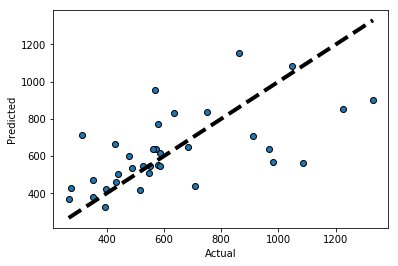

Prohibited weapons offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13362944405525923 seconds
MOST IMPORTANT FEATURES:
Opal Prohibited weapons offences 0.399917277228
tr_tweeters 0.112248490981
replyers_per_capita 0.0827497461856
TF-IDF Prohibited weapons offences 0.0706458847397
in_tweeters 0.0406404855226
Night_pcapita 0.0369181998559
total_tweeters 0.0324471983088
link_tweets_ratio 0.0304225829049
ja_tweeters 0.0290160345139
Prof_exists_pcapita 0.0284937851384
instagrammers_ratio 0.0264595113614
Polr_Neg_N_pcapita 0.0211175195214
Evening_pcapita 0.0197510355849
tl_tweeters 0.0144381889596
Polr_Neg_A_pcapita 0.0140735509373
Polr_Neg_E_pcapita 0.01232561

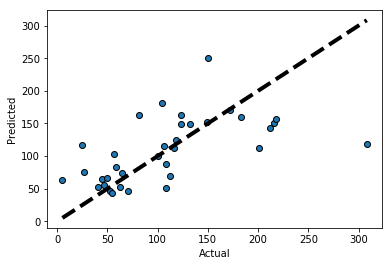

In [26]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS TFIDF AND OPAL:')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist() + ['TF-IDF '+crime] + ['Opal '+crime]
    y_cols = ['LGA',crime]
    X = derived[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['TFIDF+OPAL+DERIVED '+crime] = preds[preds.columns[-1]]

In [27]:
output.to_csv("../../data/clean/ensemble_gs_tfidf_opal_17_rfr_preds.csv",index=False)

DERIVED FEATURES RFR:
Assault - domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1270500267855823 seconds
MOST IMPORTANT FEATURES:
replyers_per_capita 0.364596798567
tr_tweeters 0.0833146927329
tl_tweeters 0.0827584256622
link_tweets_ratio 0.0768819318186
instagrammers_ratio 0.0538703526296
in_tweeters 0.0506284392834
Polr_Neg_A_pcapita 0.0472160392714
Polr_Neg_M_pcapita 0.0425837245796
ja_tweeters 0.0371690209845
Morning_pcapita 0.0312205377299
Night_pcapita 0.0272001970373
total_tweeters 0.026060140353
Afternoon_pcapita 0.0189415326058
Evening_pcapita 0.0179131867407
Polr_Neg_N_pcapita 0.0166509190708
Polr_Neg_E_pcapita 0.0145073047807
Prof_exi

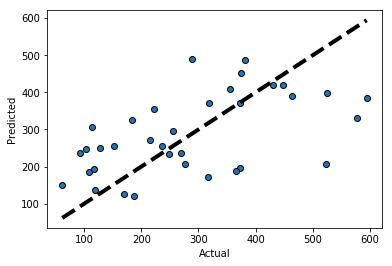

Assault - non-domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13710189377889037 seconds
MOST IMPORTANT FEATURES:
ja_tweeters 0.253712067963
total_tweeters 0.23532481023
tr_tweeters 0.162280020764
replyers_per_capita 0.0674044172881
Afternoon_pcapita 0.0470260930028
Polr_Neg_N_pcapita 0.0418141019437
Prof_exists_pcapita 0.0306838830228
link_tweets_ratio 0.024107701439
tl_tweeters 0.0215945366041
in_tweeters 0.0207000005732
Polr_Neg_E_pcapita 0.0189716181542
instagrammers_ratio 0.0171631983164
Polr_Neg_M_pcapita 0.0169459921404
Polr_Neg_A_pcapita 0.0132430274478
Evening_pcapita 0.0128422504865
Morning_pcapita 0.0103742176869
Night_pcapita 0.005812

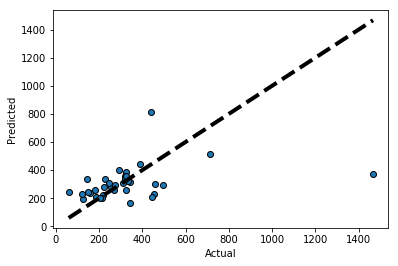

Fraud
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.14085465902462602 seconds
MOST IMPORTANT FEATURES:
ja_tweeters 0.285735653882
total_tweeters 0.21687082674
instagrammers_ratio 0.112992223788
tr_tweeters 0.0754611444189
link_tweets_ratio 0.0754120549798
tl_tweeters 0.0582626984198
Polr_Neg_N_pcapita 0.0406568859962
in_tweeters 0.0242151373712
Polr_Neg_A_pcapita 0.0239930967693
Prof_exists_pcapita 0.0232475269749
Afternoon_pcapita 0.0133142989617
replyers_per_capita 0.0108356665909
Evening_pcapita 0.00963237128247
Polr_Neg_E_pcapita 0.00845638352858
Night_pcapita 0.00759283200179
Polr_Neg_M_pcapita 0.00740240689854
Morning_pcapita 0.00591879139639
R2: -0.02073

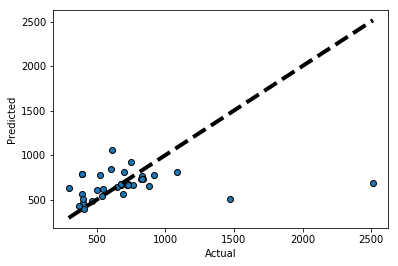

Sexual Offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13544640876352787 seconds
MOST IMPORTANT FEATURES:
instagrammers_ratio 0.205737895543
total_tweeters 0.12747345784
link_tweets_ratio 0.102994955072
replyers_per_capita 0.0891256805547
tl_tweeters 0.079906702734
tr_tweeters 0.0670988559643
Polr_Neg_A_pcapita 0.0589493394741
ja_tweeters 0.0455152177209
Polr_Neg_M_pcapita 0.0418376326389
Afternoon_pcapita 0.0363615359655
Morning_pcapita 0.0302494911139
Polr_Neg_E_pcapita 0.0259515438521
Prof_exists_pcapita 0.0232717119227
Polr_Neg_N_pcapita 0.0214544764505
Evening_pcapita 0.0193608399526
Night_pcapita 0.0139699267799
in_tweeters 0.0107407364213
R2: 0.14

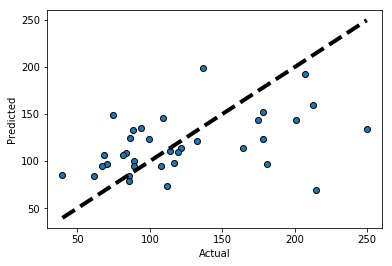

Malicious damage to property
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1326265470124781 seconds
MOST IMPORTANT FEATURES:
tr_tweeters 0.21710976003
tl_tweeters 0.172377278039
replyers_per_capita 0.118123023002
instagrammers_ratio 0.107861530215
total_tweeters 0.0801175715842
Evening_pcapita 0.0477586351897
link_tweets_ratio 0.0429347185913
Polr_Neg_N_pcapita 0.0371649554817
Morning_pcapita 0.0299039569593
Night_pcapita 0.0290033629183
ja_tweeters 0.0238056918672
Afternoon_pcapita 0.0229868663218
in_tweeters 0.0207670491008
Polr_Neg_E_pcapita 0.0158156288759
Polr_Neg_M_pcapita 0.0154166663415
Polr_Neg_A_pcapita 0.0103147952303
Prof_exists_pcapita 0.0085385102

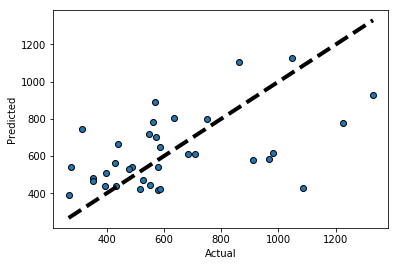

Prohibited weapons offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13773395214229822 seconds
MOST IMPORTANT FEATURES:
replyers_per_capita 0.256919472767
tr_tweeters 0.191555889211
instagrammers_ratio 0.0826933285821
ja_tweeters 0.0582647645338
Night_pcapita 0.050314190863
Polr_Neg_N_pcapita 0.0470672640419
Evening_pcapita 0.0456724344826
total_tweeters 0.0442808427263
link_tweets_ratio 0.0440592827853
tl_tweeters 0.0430079370133
in_tweeters 0.0368731556356
Prof_exists_pcapita 0.0218484884476
Afternoon_pcapita 0.0194808106725
Polr_Neg_A_pcapita 0.0180291605711
Polr_Neg_M_pcapita 0.0165019654034
Polr_Neg_E_pcapita 0.0126935575841
Morning_pcapita 0.01073745

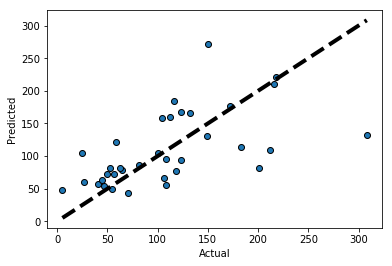

In [28]:
output = pd.DataFrame()
print('DERIVED FEATURES RFR:')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = derived_features.tolist()
    y_cols = ['LGA',crime]
    X = derived[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['DERIVED '+crime] = preds[preds.columns[-1]]

In [29]:
output.to_csv("../../data/clean/17_gs_derived_features_rfr_preds.csv",index=False)

Combine all derived features, demographic features, opal and tf-idf prediction into an ensamble model.

In [37]:
demog = pd.read_csv(os.path.join(base, 'baseline_12_features.csv')).iloc[:,1:]
demog = demog.rename(columns={'lga': 'LGA'})
demog_features = demog.columns[0:-1]
print(demog_features)

demog = derived.merge(demog, on='LGA')
demog = demog.sort_values(by=['LGA'])
# SCALE:
demog[demog.columns[1:]] = scaler.fit_transform(demog[demog.columns[1:]])
demog

Index(['Median_age_persons_G02', 'Median_mortgage_repay_monthly_G02',
       'Median_rent_weekly_G02', 'Median_tot_hhd_inc_weekly_G02',
       'Per_lone_par', 'Num_sep_males', 'Pop_density', 'Per_no_relg',
       'Per_immi', 'Per_english', 'Per_Voc'],
      dtype='object')


,LGA,instagrammers_ratio,replyers_per_capita,total_tweeters,link_tweets_ratio,Polr_Neg_A_pcapita,Polr_Neg_N_pcapita,Polr_Neg_E_pcapita,Polr_Neg_M_pcapita,Night_pcapita,...,Median_mortgage_repay_monthly_G02,Median_rent_weekly_G02,Median_tot_hhd_inc_weekly_G02,Per_lone_par,Num_sep_males,Pop_density,Per_no_relg,Per_immi,Per_english,Per_Voc
0,Bayside,0.066700,0.165568,0.183136,0.193162,0.951931,0.927172,0.907930,0.935867,0.051201,...,0.454669,0.424242,0.275768,0.485111,0.567907,0.399990,0.287587,0.659576,0.244663,0.891588
1,Blacktown,0.093916,0.016061,0.071937,0.349852,0.986677,0.994515,0.991535,0.985400,0.008417,...,0.284254,0.181818,0.333788,0.678806,0.676319,0.178152,0.115652,0.427356,0.434624,0.720228
2,Blue Mountains,0.959005,0.506968,0.504084,0.684587,0.769879,0.736569,0.667226,0.673669,0.338850,...,0.074301,0.090909,0.167918,0.540125,0.650736,0.004471,0.776284,0.100468,0.970936,0.902978
3,Burwood,0.000000,0.112854,0.003162,0.050849,0.940401,0.967580,0.957931,0.972814,0.038817,...,0.318337,0.545455,0.236860,0.381591,0.290133,0.661919,0.661509,0.239294,0.099212,0.896620
4,Camden,0.585476,0.053111,0.035573,1.000000,0.980516,0.981924,0.979839,0.991478,0.024921,...,0.331970,0.424242,0.563140,0.432470,0.607807,0.047615,0.238070,0.140160,0.847820,0.664604
5,Campbelltown,0.246735,0.011197,0.023452,0.284519,0.979934,0.966826,0.969782,0.966837,0.022319,...,0.074301,0.090909,0.161775,0.970006,0.942365,0.062318,0.207125,0.451435,0.586720,0.738190
6,Canada Bay,0.000000,0.061558,0.026877,0.270945,0.981303,0.989514,0.983436,0.965705,0.012174,...,0.522836,0.742424,0.572696,0.327474,0.268347,0.565913,0.511856,0.283560,0.430859,0.537763
7,Canterbury-Bankstown,0.013533,0.005127,0.040843,0.690967,0.998004,0.997227,0.999507,0.998597,0.001891,...,0.182004,0.181818,0.051877,0.655999,0.713452,0.401618,0.113547,0.516104,0.139013,0.741797
8,Central Coast,0.658530,0.457155,0.928063,0.396636,0.507040,0.602925,0.530280,0.560228,0.352691,...,0.011588,0.090909,0.024573,0.815856,1.000000,0.022639,0.511578,0.050799,0.957372,0.813491
9,Cumberland,0.000000,0.012390,0.022925,0.000000,0.987841,0.974430,0.962653,0.968328,0.013362,...,0.182004,0.242424,0.107167,0.475182,0.586258,0.386084,0.076725,0.395373,0.061081,0.878503


RFR ENSEMBLE 17 DERIVED FEATURES PLUS OPAL PLUS TFIDF PLUS 12 DEMOGRAPHIC FEATURES.
Assault - domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1272915918380022 seconds
MOST IMPORTANT FEATURES:
Num_sep_males 0.256104698295
Median_rent_weekly_G02 0.15795749076
Median_tot_hhd_inc_weekly_G02 0.122815240631
Per_lone_par 0.101834572827
Opal Assault - domestic violence 0.10032792151
Median_mortgage_repay_monthly_G02 0.0431263358674
Median_age_persons_G02 0.0408163014198
TF-IDF Assault - domestic violence 0.0381652370477
Per_Voc 0.0345145356257
ja_tweeters 0.0116039799385
total_tweeters 0.0102143041668
Per_immi 0.00994431568648
Prof_exists_pcapita 0.0076

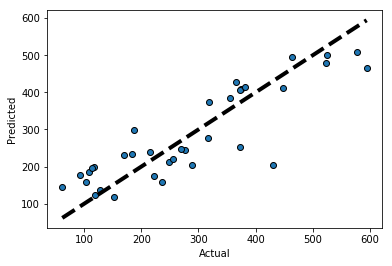

Assault - non-domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13862890377640724 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.260684218374
Pop_density 0.126338292013
tr_tweeters 0.109503291864
ja_tweeters 0.0777776540511
Per_no_relg 0.0632766865758
Num_sep_males 0.061053887436
Per_Voc 0.0598140049225
total_tweeters 0.0509583003378
Median_age_persons_G02 0.0318867966327
Polr_Neg_N_pcapita 0.0171568669429
Median_tot_hhd_inc_weekly_G02 0.0147250879521
Morning_pcapita 0.0117106480596
Per_english 0.0114159812269
replyers_per_capita 0.0103286214436
Median_rent_weekly_G02 0.0096861263073
Polr_Neg_A_pcapita 0.00952408474378
tl_tweeters 0.0088123347668

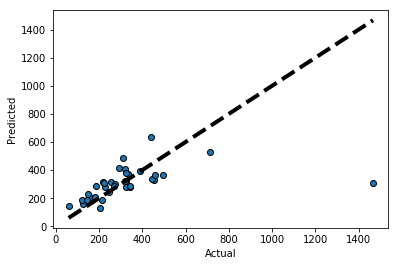

Fraud
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13973543187603354 seconds
MOST IMPORTANT FEATURES:
Pop_density 0.118985494871
Per_Voc 0.113351813467
Median_age_persons_G02 0.109680325054
total_tweeters 0.108838120196
Per_english 0.0836869016441
Per_lone_par 0.0746875619225
ja_tweeters 0.0534606292952
TF-IDF Fraud 0.0469323284944
instagrammers_ratio 0.0450600465735
tl_tweeters 0.031885226993
tr_tweeters 0.0303833739787
Opal Fraud 0.0213158035961
Per_no_relg 0.0212025531262
Median_tot_hhd_inc_weekly_G02 0.0173754863888
Per_immi 0.0161425199739
link_tweets_ratio 0.013867394045
Prof_exists_pcapita 0.0121989491051
Polr_Neg_N_pcapita 0.0109850155808
in_tweeters 0

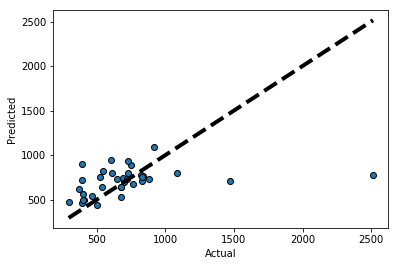

Sexual Offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.14093356020748615 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.226431229067
TF-IDF Sexual Offences 0.0834946250477
Median_age_persons_G02 0.066544070561
total_tweeters 0.0609054145259
Num_sep_males 0.0605985453895
tl_tweeters 0.0549094063255
Per_Voc 0.0534249982068
Per_lone_par 0.0509597535279
Pop_density 0.0421423428462
Polr_Neg_A_pcapita 0.0293994257034
Median_mortgage_repay_monthly_G02 0.0272067025579
Median_tot_hhd_inc_weekly_G02 0.0250664156499
tr_tweeters 0.0226278983714
Per_english 0.0216236728012
replyers_per_capita 0.0202305211097
Per_immi 0.0171928025936
Morning_pcapita 0.01678

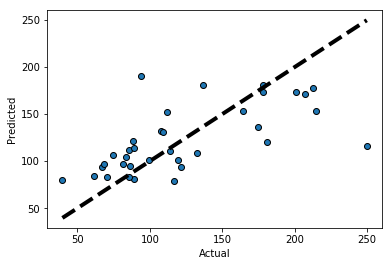

Malicious damage to property
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1362235201522708 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.30665957079
tl_tweeters 0.105725191507
tr_tweeters 0.095390576275
Num_sep_males 0.0752601816872
Per_Voc 0.0712765840799
Opal Malicious damage to property 0.0574885772776
total_tweeters 0.0452117617274
Median_rent_weekly_G02 0.0320051347432
Night_pcapita 0.0222947059248
Per_english 0.0208307601081
Median_age_persons_G02 0.0184549128987
TF-IDF Malicious damage to property 0.0145092402372
Pop_density 0.0139949435242
Prof_exists_pcapita 0.0126783570887
Polr_Neg_N_pcapita 0.0115296114894
link_tweets_ratio 0.0104884804701
Median_

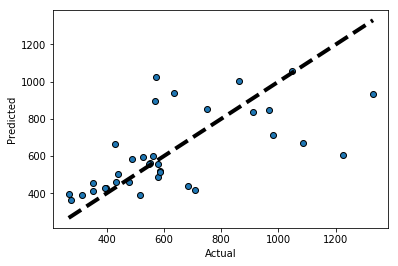

Prohibited weapons offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13961071986705065 seconds
MOST IMPORTANT FEATURES:
Opal Prohibited weapons offences 0.173496896578
Per_lone_par 0.149233422254
Num_sep_males 0.101804946493
Per_Voc 0.0872830361457
tr_tweeters 0.0791706084858
Median_rent_weekly_G02 0.057420938228
Median_tot_hhd_inc_weekly_G02 0.047328138705
Median_mortgage_repay_monthly_G02 0.0458633334133
total_tweeters 0.0295053569807
replyers_per_capita 0.0279674850246
in_tweeters 0.0218585572172
Prof_exists_pcapita 0.0203745680868
Polr_Neg_N_pcapita 0.0191795067648
link_tweets_ratio 0.0187748347135
ja_tweeters 0.0167816806999
Night_pcapita 0.0159212770

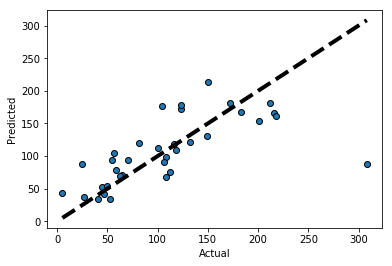

In [39]:
output = pd.DataFrame()
print('RFR ENSEMBLE 17 DERIVED FEATURES PLUS OPAL PLUS TFIDF PLUS 12 DEMOGRAPHIC FEATURES.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = demog_features.tolist() + derived_features.tolist() + ['TF-IDF '+crime] + ['Opal '+crime]
    y_cols = ['LGA',crime]
    X = demog[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['ENSEMBLE30 '+crime] = preds[preds.columns[-1]]

In [40]:
output.to_csv("../../data/clean/ensemble_gs_31_features_rfr_preds.csv",index=False)

RFR 12 DEMOGRAPHIC FEATURES ONLY.
Assault - domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.12425305461511016 seconds
MOST IMPORTANT FEATURES:
Num_sep_males 0.330210260271
Median_rent_weekly_G02 0.151421557629
Per_lone_par 0.138225716204
Median_tot_hhd_inc_weekly_G02 0.128369784625
Median_age_persons_G02 0.0767288310681
Per_Voc 0.069690584101
Median_mortgage_repay_monthly_G02 0.042557149743
Per_immi 0.0196567299102
Per_english 0.0153529512424
Pop_density 0.0152802126326
Per_no_relg 0.0125062225747
R2: 0.672535645709
RMSE: 83.5467647737
MAPE: 27.0834168834
Mean APE Baseline: 65.6858695112


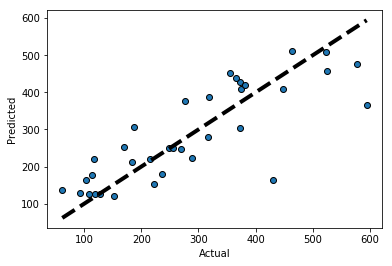

Assault - non-domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.14069688180461526 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.322733037931
Per_no_relg 0.219796735771
Per_Voc 0.173525763678
Num_sep_males 0.092689654544
Median_age_persons_G02 0.0519429652361
Pop_density 0.0423362732128
Median_rent_weekly_G02 0.0212809728384
Median_tot_hhd_inc_weekly_G02 0.0210655646531
Per_english 0.0191914255058
Median_mortgage_repay_monthly_G02 0.0183583154766
Per_immi 0.0170792911534
R2: 0.166000488719
RMSE: 213.150253277
MAPE: 32.7548428744
Mean APE Baseline: 55.3301133377


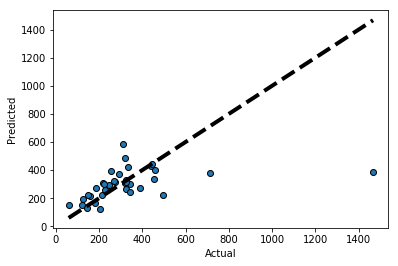

Fraud
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.13914412911981344 seconds
MOST IMPORTANT FEATURES:
Pop_density 0.229991904
Median_age_persons_G02 0.164220014738
Per_Voc 0.141366991574
Per_english 0.134146821113
Per_lone_par 0.127544024309
Per_no_relg 0.0886587381454
Per_immi 0.0405078340568
Median_tot_hhd_inc_weekly_G02 0.0373793388955
Num_sep_males 0.0141527254588
Median_rent_weekly_G02 0.0114609539437
Median_mortgage_repay_monthly_G02 0.0105706537658
R2: 0.0638244094664
RMSE: 373.232868358
MAPE: 30.9357217759
Mean APE Baseline: 35.2137646312


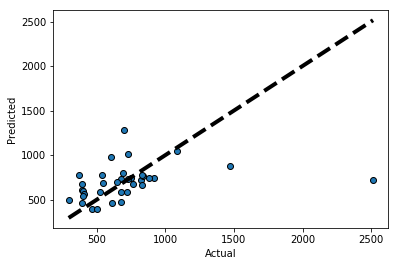

Sexual Offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1382245598360896 seconds
MOST IMPORTANT FEATURES:
Median_rent_weekly_G02 0.304357034533
Per_Voc 0.15339481526
Num_sep_males 0.104415226818
Per_lone_par 0.080109270677
Median_age_persons_G02 0.0798712015131
Pop_density 0.0784723572238
Per_english 0.0542812789279
Per_immi 0.0392321708756
Median_tot_hhd_inc_weekly_G02 0.0369830283831
Per_no_relg 0.0348238870018
Median_mortgage_repay_monthly_G02 0.0340597287869
R2: 0.314729321101
RMSE: 43.0433035321
MAPE: 29.3250974321
Mean APE Baseline: 41.1123583129


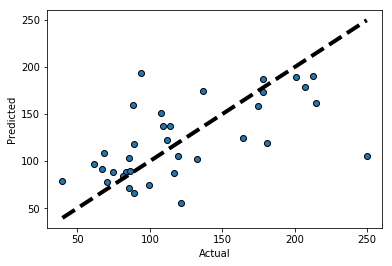

Malicious damage to property
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1415205141529441 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.277980687456
Per_Voc 0.233893229529
Num_sep_males 0.170481655768
Per_english 0.057870996794
Pop_density 0.056889198617
Median_mortgage_repay_monthly_G02 0.0561264438509
Per_no_relg 0.0407743855734
Median_rent_weekly_G02 0.039278062543
Median_age_persons_G02 0.0294572473603
Per_immi 0.0260210028764
Median_tot_hhd_inc_weekly_G02 0.0112270896326
R2: 0.358247993222
RMSE: 212.106672381
MAPE: 25.1218569992
Mean APE Baseline: 37.5046039636


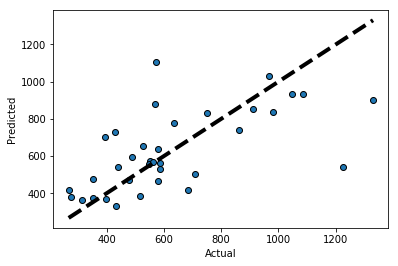

Prohibited weapons offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.14219403406605124 seconds
MOST IMPORTANT FEATURES:
Per_Voc 0.25825825498
Per_lone_par 0.200432448676
Num_sep_males 0.170095669002
Median_rent_weekly_G02 0.085493293471
Median_tot_hhd_inc_weekly_G02 0.0759182130323
Median_mortgage_repay_monthly_G02 0.0570782663419
Per_no_relg 0.0442962249623
Pop_density 0.0372753910734
Per_english 0.0293846494878
Median_age_persons_G02 0.0212106011979
Per_immi 0.0205569877749
R2: 0.280756768863
RMSE: 56.3648704103
MAPE: 62.1668426455
Mean APE Baseline: 120.990088629


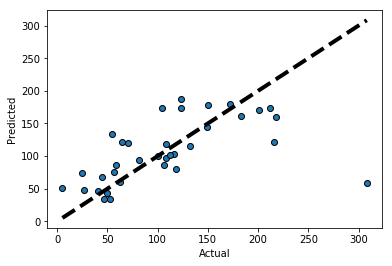

In [41]:
output = pd.DataFrame()
print('RFR 12 DEMOGRAPHIC FEATURES ONLY.')
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = demog_features.tolist()
    y_cols = ['LGA',crime]
    X = demog[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    if len(output.columns) == 0:
        output['LGA'] = preds['LGA']
    output['Demog '+crime] = preds[preds.columns[-1]]

In [42]:
output.to_csv("../../data/clean/demographics_gs_rfr_preds.csv",index=False)

Ensembling improves 4 crimes and makes 2 worse on MAPE in Greater Sydney. Starting with demographics, try forward feature selection, keeping track of mean MAPE across all 6 crimes.

In [44]:
# Generates mean MAPE and std deviation across 6 crime types
def mmape_score(X, y, features, folds=10, n=4):
    mmapes = np.zeros(n)
    for i in np.arange(n):
        mmape = 0
        for crime in crimes:
            X_cols = ['TF-IDF '+crime if col=='TF-IDF' else col for col in features]
            X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
            preds, _ = rfr_cv(X[X_cols], y[['LGA',crime]], folds=folds, verbose=False, random_state=None)
            mmape += mape(preds.iloc[:,-2], preds.iloc[:,-1])
        mmapes[i] = mmape / len(crimes)
    return np.mean(mmapes), np.std(mmapes)

In [45]:
np.random.seed(2018)
selected = []
demog_mmape = mmape_score(demog, targets, demog_features.tolist())
print('Mean MAPE score for 12 demographic features',demog_mmape)
# Append a pseudo-feature for TF-IDF and Opal scores
remaining = demog_features.tolist() + derived_features.tolist() + ['TF-IDF', 'Opal']
mmapes = []
while len(remaining) > 0:
    start = timer()
    min_score = 1e+10
    for feat in remaining:
        fscore, sigma = mmape_score(demog, targets, selected + [feat])
        if fscore < min_score:
            min_score = fscore
            best_sigma = sigma
            best_feat = feat
    remaining.remove(best_feat)
    selected.append(best_feat)
    mmapes.append((min_score, best_sigma))
    end = timer()
    print('Selected', best_feat, 'with MMAPE', mmapes[-1], 'in', end-start,'seconds.')

Mean MAPE score for 12 demographic features (35.257314857483507, 0.59089831105061141)
Selected Per_lone_par with MMAPE (41.238760993796369, 2.2543366001576981) in 71.18904969282448 seconds.
Selected Pop_density with MMAPE (31.922892508992945, 1.8974056772242784) in 70.57539944630116 seconds.
Selected Per_no_relg with MMAPE (31.321493742373196, 0.26462895522688734) in 70.5640694978647 seconds.
Selected link_tweets_ratio with MMAPE (31.389919076076268, 1.0623396802938547) in 67.28271795064211 seconds.
Selected Median_age_persons_G02 with MMAPE (31.305694086105579, 1.0549404412474872) in 65.64421046199277 seconds.
Selected Night_pcapita with MMAPE (30.389264008985247, 0.28742170939753342) in 63.10539977392182 seconds.
Selected Polr_Neg_A_pcapita with MMAPE (30.069805762357912, 0.77414139563085771) in 61.30613896762952 seconds.
Selected instagrammers_ratio with MMAPE (30.447538547479027, 1.6457940730127665) in 58.45325609156862 seconds.
Selected tl_tweeters with MMAPE (30.049214212520702, 

In [46]:
print(selected)
scores, sigmas = zip(*mmapes)
print(mmapes)

['Per_lone_par', 'Pop_density', 'Per_no_relg', 'link_tweets_ratio', 'Median_age_persons_G02', 'Night_pcapita', 'Polr_Neg_A_pcapita', 'instagrammers_ratio', 'tl_tweeters', 'Evening_pcapita', 'Per_immi', 'Per_english', 'Polr_Neg_N_pcapita', 'TF-IDF', 'tr_tweeters', 'Prof_exists_pcapita', 'ja_tweeters', 'Median_rent_weekly_G02', 'in_tweeters', 'Afternoon_pcapita', 'Polr_Neg_E_pcapita', 'Morning_pcapita', 'Num_sep_males', 'replyers_per_capita', 'Per_Voc', 'Median_tot_hhd_inc_weekly_G02', 'Median_mortgage_repay_monthly_G02', 'total_tweeters', 'Polr_Neg_M_pcapita', 'Opal']
[(41.238760993796369, 2.2543366001576981), (31.922892508992945, 1.8974056772242784), (31.321493742373196, 0.26462895522688734), (31.389919076076268, 1.0623396802938547), (31.305694086105579, 1.0549404412474872), (30.389264008985247, 0.28742170939753342), (30.069805762357912, 0.77414139563085771), (30.447538547479027, 1.6457940730127665), (30.049214212520702, 1.1967819491359399), (30.856526121955149, 2.0708509196220821), (3

['Per_lone_par', 'Pop_density', 'Per_no_relg', 'link_tweets_ratio', 'Median_age_persons_G02', 'Night_pcapita', 'Polr_Neg_A_pcapita', 'instagrammers_ratio', 'tl_tweeters', 'Evening_pcapita', 'Per_immi', 'Per_english']
RFR OPTIMISED ENSEMBLE : BEST 12 FEATURES.
Assault - domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1679425840266049 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.737760213657
Median_age_persons_G02 0.0641469871778
Polr_Neg_A_pcapita 0.0536788934639
Evening_pcapita 0.0214353744443
Per_no_relg 0.0206624326889
link_tweets_ratio 0.0196318666119
Pop_density 0.017450783826
Per_immi 0.0156145039579
Night_pcapita 0.0151977229274
tl_twee

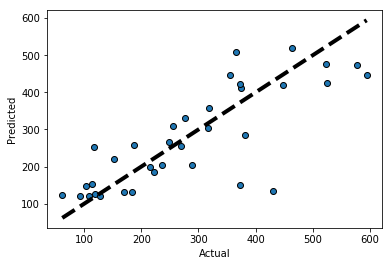

Assault - non-domestic violence
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.14072298165410757 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.400387826025
Per_no_relg 0.195692259839
Pop_density 0.114153910073
Median_age_persons_G02 0.0883028317208
Night_pcapita 0.0618469289836
tl_tweeters 0.0446127642941
Polr_Neg_A_pcapita 0.0251316710599
Evening_pcapita 0.0200335657749
Per_english 0.0170572080595
Per_immi 0.0130894236291
link_tweets_ratio 0.0128649775277
instagrammers_ratio 0.00682663301398
R2: 0.139357878832
RMSE: 216.528094305
MAPE: 30.5045431341
Mean APE Baseline: 55.3301133377


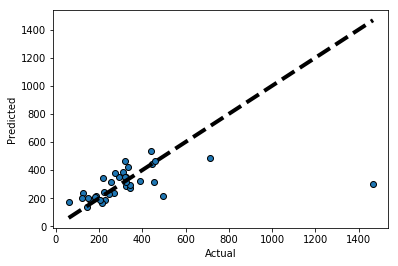

Fraud
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1441553863696754 seconds
MOST IMPORTANT FEATURES:
Pop_density 0.235835838661
Median_age_persons_G02 0.153534335317
Per_lone_par 0.150108322574
Per_english 0.114344700631
Per_no_relg 0.111946196707
tl_tweeters 0.0625614758029
instagrammers_ratio 0.0540541249681
link_tweets_ratio 0.0435562375804
Per_immi 0.0258331833592
Polr_Neg_A_pcapita 0.0255360047981
Evening_pcapita 0.0155656205246
Night_pcapita 0.00712395907594
R2: -0.116520154585
RMSE: 407.60031344
MAPE: 34.8777272434
Mean APE Baseline: 35.2137646312


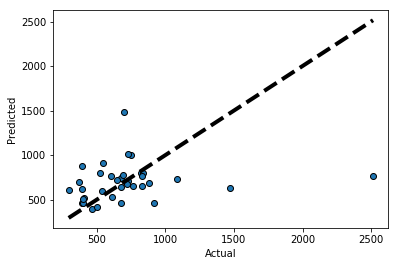

Sexual Offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.14014494000002742 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.339456471892
Polr_Neg_A_pcapita 0.151545521583
Pop_density 0.110690545802
Median_age_persons_G02 0.0986585384841
tl_tweeters 0.0976053574646
link_tweets_ratio 0.0442372002139
Per_immi 0.0395762729933
Per_english 0.0364543504842
instagrammers_ratio 0.0279944190487
Night_pcapita 0.0252113756819
Per_no_relg 0.0148030210067
Evening_pcapita 0.0137669253446
R2: 0.42712649566
RMSE: 39.3553599548
MAPE: 23.5664151767
Mean APE Baseline: 41.1123583129


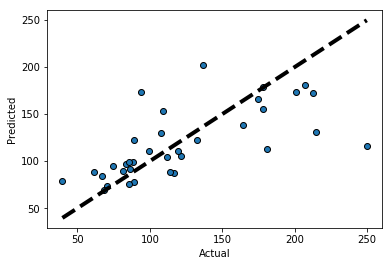

Malicious damage to property
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.14173317840322852 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.510424235118
tl_tweeters 0.186055191478
Night_pcapita 0.0718302847615
Evening_pcapita 0.0484786791908
Median_age_persons_G02 0.0435086023968
Pop_density 0.0308570082183
link_tweets_ratio 0.024820741957
Polr_Neg_A_pcapita 0.0245392249784
Per_no_relg 0.0189300192809
Per_english 0.0162892771086
Per_immi 0.0132757558797
instagrammers_ratio 0.0109909796323
R2: 0.473997104242
RMSE: 192.028098049
MAPE: 20.5121277394
Mean APE Baseline: 37.5046039636


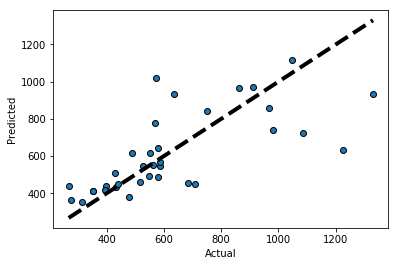

Prohibited weapons offences
Finished processing 4 records...
Finished processing 8 records...
Finished processing 12 records...
Finished processing 16 records...
Finished processing 20 records...
Finished processing 23 records...
Finished processing 26 records...
Finished processing 29 records...
Finished processing 32 records...
Finished processing 35 records...
Finished 10 fold cross validation in 0.1404538070783019 seconds
MOST IMPORTANT FEATURES:
Per_lone_par 0.548500650494
Night_pcapita 0.149498226453
Evening_pcapita 0.0695231232072
link_tweets_ratio 0.0498418843767
tl_tweeters 0.0443622636168
Per_no_relg 0.0327135393075
Polr_Neg_A_pcapita 0.0264216110627
Median_age_persons_G02 0.0214146606169
Per_immi 0.019478147265
Pop_density 0.0178270142189
instagrammers_ratio 0.0116168661918
Per_english 0.00880201318977
R2: 0.343809704664
RMSE: 53.8375790831
MAPE: 51.3789184746
Mean APE Baseline: 120.990088629


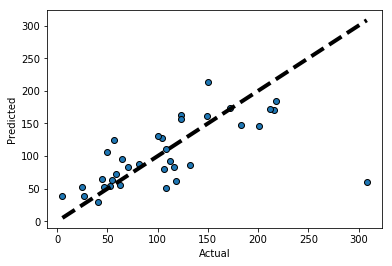

In [49]:
best = selected[:12]
print(best)
output = pd.DataFrame()
output['LGA'] = targets['LGA']
print('RFR OPTIMISED ENSEMBLE : BEST 12 FEATURES.')
np.random.seed(2018)
for crime in crimes:
    print(crime)
    start = timer()
    X_cols = ['TF-IDF '+crime if col=='TF-IDF' else col for col in best]
    X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
    y_cols = ['LGA',crime]
    X = demog[X_cols]
    y = targets[y_cols]
    preds, importants = rfr_cv(X, y, folds=10)
    end = timer()
    print('Finished 10 fold cross validation in',end-start,'seconds')
    metrics(preds, importants)
    output['BEST 12 Greater Syd '+crime] = preds[preds.columns[-1]]

In [50]:
output

,LGA,BEST 12 Greater Syd Assault - domestic violence,BEST 12 Greater Syd Assault - non-domestic violence,BEST 12 Greater Syd Fraud,BEST 12 Greater Syd Sexual Offences,BEST 12 Greater Syd Malicious damage to property,BEST 12 Greater Syd Prohibited weapons offences
0,Bayside,303.13562,377.23606,708.44114,98.79821,547.26201,110.87109
1,Blacktown,446.38076,316.31293,797.37144,138.66373,741.41501,161.85308
2,Blue Mountains,357.89614,318.61953,465.35480,155.16119,841.73925,127.32073
3,Burwood,258.40725,273.62839,628.50343,104.30325,544.90165,83.69709
4,Camden,331.16577,344.14330,915.48127,152.91235,618.42016,130.29818
5,Campbelltown,472.57048,441.49538,776.97350,130.87770,721.76764,146.53498
6,Canada Bay,253.26146,202.77285,657.83935,88.45851,412.31698,65.35774
7,Canterbury-Bankstown,423.45924,353.18328,1003.93295,99.41126,777.30254,162.91885
8,Central Coast,424.71276,535.77315,528.94431,180.64262,1116.90888,213.52103
9,Cumberland,286.10737,318.47927,1007.67992,88.61711,551.28496,86.03665


In [51]:
output.to_csv("../../data/clean/ensemble_best_gs_rfr_preds.csv",index=False)

In [52]:
# Generates mean MAPE and std deviation for one crime type
def score_crime(X, y, features, crime, n=20, folds=10):
    mapes = np.zeros(n)
    for i in np.arange(n):
        X_cols = ['TF-IDF '+crime if col=='TF-IDF' else col for col in features]
        X_cols = ['Opal '+crime if col=='Opal' else col for col in X_cols]
        preds, _ = rfr_cv(X[X_cols], y[['LGA',crime]], folds=folds, verbose=False, random_state=None)
        mapes[i] = mape(preds.iloc[:,-2], preds.iloc[:,-1])
    return mapes

In [53]:
print('RFR BEST CRIME SCORES')
np.random.seed(2018)
best_crime_scores = {}
for crime in crimes:
    scores = score_crime(demog, targets, best, crime, n=100)
    best_crime_scores[crime] = scores
    print(crime,'MEAN:',np.mean(scores),'STD DEV:',np.std(scores))

RFR BEST CRIME SCORES
Assault - domestic violence MEAN: 28.9424453558 STD DEV: 2.14377396164
Assault - non-domestic violence MEAN: 31.4630084283 STD DEV: 3.17176513053
Fraud MEAN: 31.7936338246 STD DEV: 3.52234608913
Sexual Offences MEAN: 26.3401721737 STD DEV: 2.1123561265
Malicious damage to property MEAN: 20.5823908156 STD DEV: 1.6258358257
Prohibited weapons offences MEAN: 49.9392608617 STD DEV: 4.24371847144


In [54]:
print('RFR 12 DEMOGRAPHIC')
np.random.seed(2018)
dem12_crime_scores = {}
for crime in crimes:
    scores = score_crime(demog, targets, demog_features.tolist(), crime, n=100)
    dem12_crime_scores[crime] = scores
    print(crime,'MEAN:',np.mean(scores),'STD DEV:',np.std(scores))

RFR 12 DEMOGRAPHIC
Assault - domestic violence MEAN: 27.5363616886 STD DEV: 1.81360281763
Assault - non-domestic violence MEAN: 37.0048440673 STD DEV: 2.78018945348
Fraud MEAN: 32.063491593 STD DEV: 2.63816957402
Sexual Offences MEAN: 28.2964789874 STD DEV: 2.36149626353
Malicious damage to property MEAN: 24.6370539669 STD DEV: 1.93425998146
Prohibited weapons offences MEAN: 61.5367554209 STD DEV: 4.88061571034


In [55]:
#unpaired t test
from scipy import stats
for crime in crimes:
    t,p = stats.ttest_ind(dem12_crime_scores[crime], best_crime_scores[crime])
    print("T statistic:",t,"P value:",p)

T statistic: -4.98230213967 P value: 1.3660998417e-06
T statistic: 13.0734072037 P value: 1.45184555829e-28
T statistic: 0.610130741855 P value: 0.542474819319
T statistic: 6.1434955152 P value: 4.35136880714e-09
T statistic: 15.9662159921 P value: 1.99488375013e-37
T statistic: 17.8418607877 P value: 4.43222806377e-43


In [56]:
from scipy.stats import t

def crime_ci(crime, sample1, sample2):
    assert len(sample1) == len(sample2)
    
    tstat,p = stats.ttest_ind(sample1, sample2)

    # Calculate the 95% confidence interval
    N1 = len(sample1)
    N2 = len(sample2)
    df = (N1 + N2 - 2)
    std1 = np.std(sample1)
    std2 = np.std(sample2)
    std_N1N2 = np.sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / df) 
    moe = t.ppf(0.975, df) * std_N1N2 * np.sqrt(1/N1 + 1/N2)

    return tstat, p, moe

for crime in crimes:
    print('\n',crime)
    tstat, p, moe = crime_ci(crime, dem12_crime_scores[crime], best_crime_scores[crime])
    diff = np.mean(dem12_crime_scores[crime]) - np.mean( best_crime_scores[crime])
    print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:7.6f}'.format(tstat,p))
    print ('The difference between groups is {:4.3f} [{:4.3f} to {:4.3f}] (mean [95% CI])'.format(diff, diff - moe, diff + moe))



 Assault - domestic violence
The results of the independent t-test are: 
	t-value = -4.982
	p-value = 0.000001
The difference between groups is -1.406 [-1.960 to -0.852] (mean [95% CI])

 Assault - non-domestic violence
The results of the independent t-test are: 
	t-value = 13.073
	p-value = 0.000000
The difference between groups is 5.542 [4.710 to 6.374] (mean [95% CI])

 Fraud
The results of the independent t-test are: 
	t-value = 0.610
	p-value = 0.542475
The difference between groups is 0.270 [-0.598 to 1.138] (mean [95% CI])

 Sexual Offences
The results of the independent t-test are: 
	t-value = 6.143
	p-value = 0.000000
The difference between groups is 1.956 [1.331 to 2.581] (mean [95% CI])

 Malicious damage to property
The results of the independent t-test are: 
	t-value = 15.966
	p-value = 0.000000
The difference between groups is 4.055 [3.556 to 4.553] (mean [95% CI])

 Prohibited weapons offences
The results of the independent t-test are: 
	t-value = 17.842
	p-value = 0.00